In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "standard"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["url"] not in skipUrls
        if x["date"] >= startDate
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

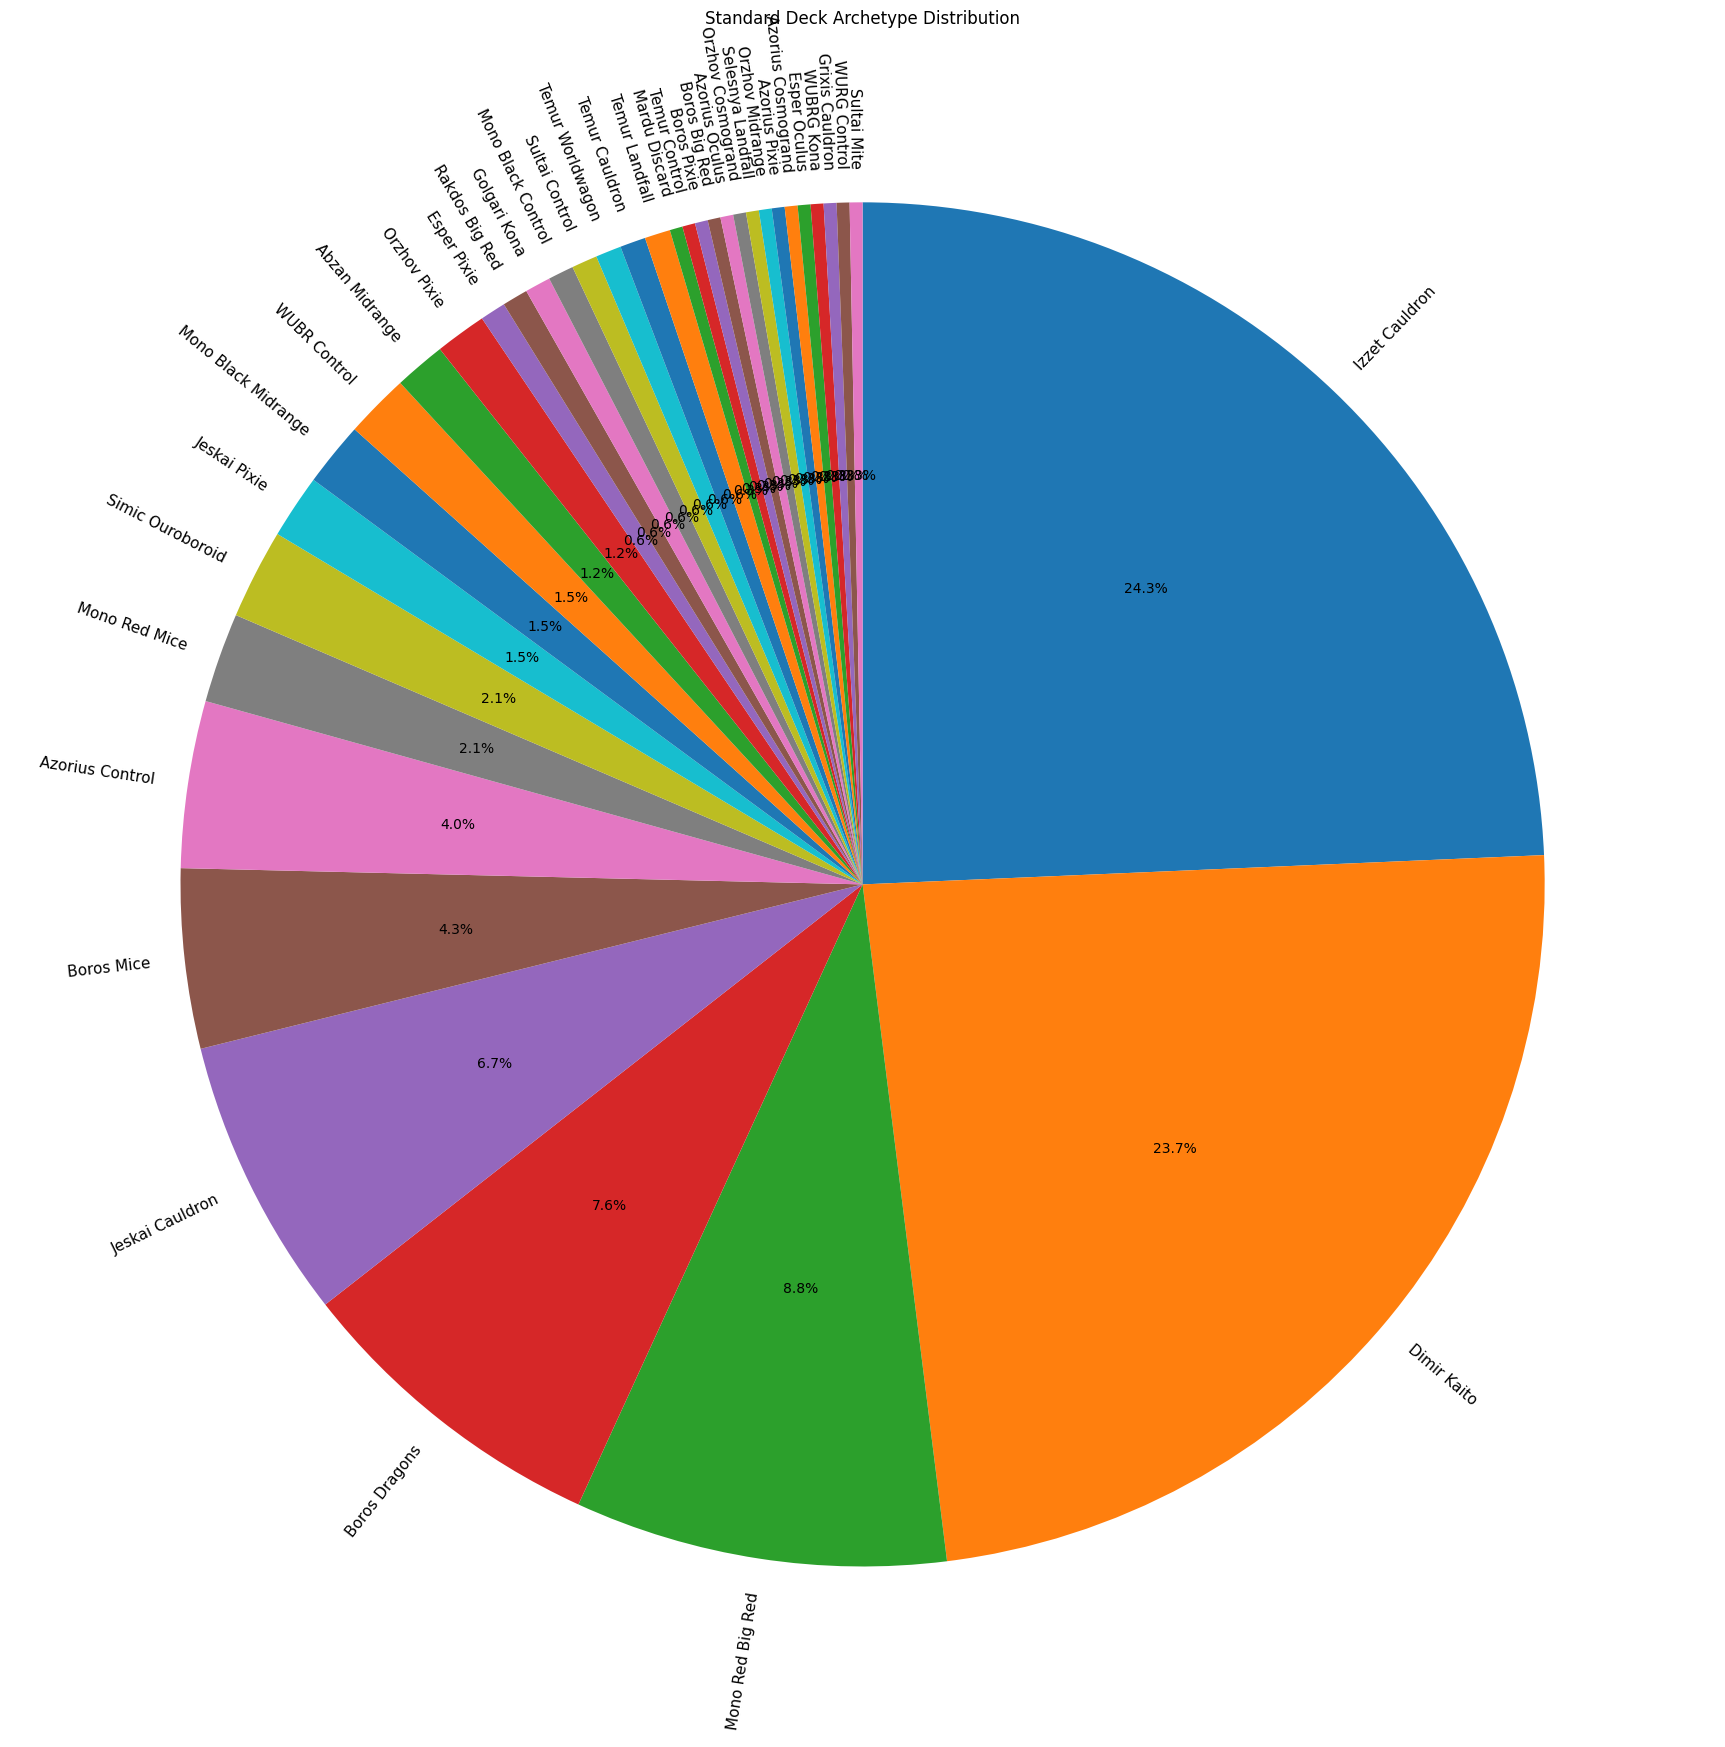

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

7 deck(s) without any of the specified key cards
Mono Black Control


Main/Side  \
Deck URL                                           Deck               
/decklist/standard-challenge-32-2025-08-2912812773 Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Side   
                                                   Deck 9      Side   

                                                                          Card Name  \
Deck URL                                           Deck                               
/decklist/standard-challenge-32-2025-08-2912812773 Deck 9  Dark Knight's Greatsword   
                                                   Deck 9  Dark Knight's Greatsword   
                                                   Deck 9           Deep-Cavern Bat   
                                                   Deck 9           Deep-Cavern Bat   
                                                   Deck 9         Faerie Dreamthief   
                                                   Deck 9         Faerie Dreamthief   
                                                   Deck 9     Gatekeeper of Malakir   
                                                   Deck 9     Gatekeeper of Malakir   
                                                   Deck 9            Forsaken Miner   
                                                   Deck 9            Forsaken Miner   
                                                   Deck 9        Strategic Betrayal   
                                                   Deck 9        Strategic Betrayal   
                                                   Deck 9           Timeline Culler   
                                                   Deck 9           Timeline Culler   
                                                   Deck 9   Thought-Stalker Warlock   
                                                   Deck 9   Thought-Stalker Warlock   
                                                   Deck 9            Nowhere 

In [4]:
includedCardList = ["Vivi Ornitier"]
excludedCardList = ["Agatha's Soul Cauldron"]
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

ValueError: No objects to concatenate

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain                       3230
Island                         2042
Swamp                          1238
Soulstone Sanctuary            1152
Riverpyre Verge                1048
                               ... 
Bramble Familiar                  2
Calamity, Galloping Inferno       2
Wylie Duke, Atiin Hero            2
Zack Fair                         2
Zombify                           2
Name: Quantity, Length: 334, dtype: int64

In [7]:
Queries.avgArchetype(deckList, "Izzet Cauldron", "Main")

Main/Side  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2512812724 Deck 15      Main   
                                                   Deck 15      Main   
                                                   Deck 15      Main   
                                                   Deck 15      Main   
                                                   Deck 15      Main   
...                                                              ...   
/decklist/standard-league-2025-08-319495           Deck 3       Main   
                                                   Deck 3       Main   
                                                   Deck 3       Main   
                                                   Deck 3       Main   
                                                   Deck 3       Main   

                                                                      Card Name  \
Deck URL                                           Deck                           
/decklist/standard-challenge-32-2025-08-2512812724 Deck 15               Island   
                                                   Deck 15               Island   
                                                   Deck 15                  Opt   
                                                   Deck 15                  Opt   
                                                   Deck 15      Riverpyre Verge   
...                                                                         ...   
/decklist/standard-league-2025-08-319495           Deck 3   Soulstone Sanctuary   
                                                   Deck 3    Tersa Lightshatter   
                                                   Deck 3    Tersa Lightshatter   
                                                   Deck 3             Wild Ride   
                                                   Deck 3             Wild Ride   

                                                            Quantity  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2512812724 Deck 15         7   
                                                   Deck 15         7   
                                                   Deck 15         4   
                                                   Deck 15         4   
                                                   Deck 15         4   
...                                                              ...   
/decklist/standard-league-2025-08-319495           Deck 3          1   
                                                   Deck 3          1   
                                                   Deck 3          1   
                                                   Deck 3          1   
                                                   Deck 3          1   

                                                           mana_cost  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2512812724 Deck 15             
                                                   Deck 15             
                                                   Deck 15       {U}   
                                                   Deck 15       {U}   
                                                   Deck 15             
...                                                              ...   
/decklist/standard-league-2025-08-319495           Deck 3              
                                                   Deck 3     {2}{R}   
                                                   Deck 3     {2}{R}   
                                                   Deck 3        {R}   
                                                   Deck 3        {R}   

                                                                                  type_line  \
Deck URL                                           Deck                  

In [8]:
[deck.deckId
for deck in deckList
if "Vivi Ornitier" in deck.uniqueCards['Main']
if "Agatha's Soul Cauldron" not in deck.uniqueCards['Main']
]

[]